In [2]:
# PyTorch Libraries
import torch
import torchmetrics
import torch.nn as nn

from torch.utils.data import DataLoader

from torch.nn import Flatten
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Dropout2d
from torch.nn import Conv2d
from torch.nn import MaxPool2d

from torch.nn import CrossEntropyLoss

from torch.optim import SGD
from torch.optim import AdamW
from torchmetrics import Accuracy

# Data Libraries
import pandas as pd
import numpy as np

# Image Processing Libraries
import cv2
from PIL import Image
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Data Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

# File Automation Libraires
from pathlib import Path
import os

import random

C:\Users\Brand\anaconda3\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")
C:\Users\Brand\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


1. **Creating a Custom Dataset with PyTorch**
    - Understanding what a Custom Dataset is
    - Learning how to Create a Custom Dataset
    <br></br>
    
2. **Understanding Batching**
    <br></br>
    <pre>
    tab level 0
        tab level 1
                tab level 2
    </pre>

3. **Understanding Conv2D**
    - In & out channels
    - Understanding how the hyperparameters effect the image processing
    <br></br>
4. **Understanding Max and Mean Pooling**
    - Understanding how the hyperparameters effect the image processing
    <br></br>

5. **How to Flatten the Image and Use a Linear Layer**
    - Using the **`Flatten`** class from **`torch.nn`** we are going to flatten the image to a 1-D vector
    - This allows us to do a fully-connected layer and return an output layer with the same dimension as the `output_shape`
    <br></br>

### Batching

- Batching is the process of clustering datapoints into groups
- This allows faster training time, and more effecient training
- In `torch.utils.data`, there is a class called `DataLoader` allows us to make batches of data from a large Dataset

In [3]:
torch.manual_seed(42)

BATCH_SIZE = 8
IMAGE_SIZE = (32, 3, 64, 64) #[batch_size, color_channels, height, width]

images = torch.randn(size=IMAGE_SIZE) 

# each image has three channels (RGB) and each image is 64x64
# for this example above, there are 32 of these 3 channel image that have a shape of (64,64)
print(f"Number of Batches of RGB Images -> {len(images)}") 


# changes the number of batches
batch_images = DataLoader(images, batch_size=BATCH_SIZE, shuffle=True)
batch_feature_image = next(iter(batch_images))
print(f"Images Size: {batch_feature_image.size()}")

Number of Batches of RGB Images -> 32
Images Size: torch.Size([8, 3, 64, 64])


### Conv2D
- In **`torch.nn`**,  **`conv2d`** is used to process 2D images 

**Parameters** 
   - **`in_channels`**: Number of channels in this picture (RGB = 3 channels), (Grey Scaling = 1 channel)
   - **`out_channels`**: Number of created channels after running through the Conv Layer
   - **`kernel_size`**: Dimension of a filter you want to extract from the image
   - **`stride`**: How big of a step does the kernel/filter scan through the image
   - **`padding`**: Increases how much of a 

**Input**
   - Takes in a **`[batch_size, color_channels, height, width]`** 
   - You can use methods like **`unsqueeze(dim=0)`** to increase the dimension by one
    
    
### What are Channels?
- Channels are used to represent the number of primary colors are in an image

**Examples**
   - **`GreyScale Images`**: Only have one channel
   - **`Digital Images`**: Only have three channel

In [4]:
test_image = images[0]
print(f"Original Image Shape: {test_image.size()}")

conv2d = Conv2d(in_channels=3,
                out_channels=10, # Creates more filters / kernels, allowing to gather more information from the info,
                kernel_size=(4,4), # Increasing kernal_size means a smaller image shape,
                stride=2, # Increasing stride means a smaller image shape,
                padding=4) # Increasing padding means a greater image shape)


test_image_conv2d = conv2d(test_image.unsqueeze(dim=0))
print(f"Image Shape After Conv2D: {test_image_conv2d.squeeze(dim=0).size()}")

Original Image Shape: torch.Size([3, 64, 64])
Image Shape After Conv2D: torch.Size([10, 35, 35])


### MaxPooling and Mean Pooling
- Pooling is used to find more information in images after the conv layer 
- In **`torch.nn`**,  **`MaxPool2d`** and **`AvgPool2d`** are commonly used for pooling

**Mean Pooling**
   - Mean Pooling is the same as a filter in Conv2D but unlike trainable parameters, it takes the mean values for the values it scan and returns it  
   

   1. **`AvgPool2d`** Parameters
       - **`kernel_size`**: Dimension of a filter you want to extract from the image
       - **`stride`**: How big of a step does the kernel/filter scan through the image
       - **`padding`**: Puts null values around the images
    
**Max Pooling**
   - Max Pooling is the same as a filter in Conv2D but unlike trainable parameters, it takes the max values for the values it scan and returns it  
   - More commonly used for object detection
   
   1. **`MaxPool2d`** Parameters
       - **`kernel_size`**: Dimension of a filter you want to extract from the image
       - **`stride`**: How big of a step does the kernel/filter scan through the image
       - **`padding`**: Puts null values around the images

In [5]:
print(f"Image Shape After Conv2D: {test_image_conv2d.squeeze(dim=0).size()}")
max_pool = MaxPool2d(kernel_size=3, # Increasing kernel_size means a smaller image shape
                     stride=1) # Increasing stride means a smaller image shape

test_image_maxpool = max_pool(test_image_conv2d)
print(f"Image Shape After MaxPool2D: {test_image_maxpool.squeeze(dim=0).shape}")

Image Shape After Conv2D: torch.Size([10, 35, 35])
Image Shape After MaxPool2D: torch.Size([10, 33, 33])


### Custom Dataset in PyTorch
- We are going to introduce how to create custom Datasets in PyTorch

**Iterating Through Our Directory**

   - Using **`os.walk()`**, we can go through every folder and file in our image dataset
     <br></br>
     
**Understanding The Image**
   - Look through the Images and understand the image (dimension, color grad, etc.)
   - Using the **`PIL`** Library, we can open images using **`Image`** to find out the information above
    <br></br>

**Creating a Custom Dataset**
   - Using Torchvision's **`Dataset`** or **`ImageFolder`**, we can iterate through all the files in directory
   - After using these classes, we use **`DataLoader`** to import our data into batches to train out model
    <br></br>
    
**Implementing Data Augmentation**
   - Using Torchvision's **`Transform`**, we can implement some data augmentation into our model
   <br></br>

In [6]:
# Path for our Image Dataset
dataset_path = Path("FruitsVegetables/")

def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(dataset_path)

# Source: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb

There are 3 directories and 0 images in 'FruitsVegetables'.
There are 36 directories and 0 images in 'FruitsVegetables\test'.
There are 0 directories and 10 images in 'FruitsVegetables\test\apple'.
There are 0 directories and 9 images in 'FruitsVegetables\test\banana'.
There are 0 directories and 10 images in 'FruitsVegetables\test\beetroot'.
There are 0 directories and 10 images in 'FruitsVegetables\test\bell pepper'.
There are 0 directories and 10 images in 'FruitsVegetables\test\cabbage'.
There are 0 directories and 10 images in 'FruitsVegetables\test\capsicum'.
There are 0 directories and 10 images in 'FruitsVegetables\test\carrot'.
There are 0 directories and 10 images in 'FruitsVegetables\test\cauliflower'.
There are 0 directories and 10 images in 'FruitsVegetables\test\chilli pepper'.
There are 0 directories and 10 images in 'FruitsVegetables\test\corn'.
There are 0 directories and 10 images in 'FruitsVegetables\test\cucumber'.
There are 0 directories and 10 images in 'FruitsVeg

FruitsVegetables\train\chilli pepper
Random image path: FruitsVegetables\train\chilli pepper\Image_35.jpg
Image class: chilli pepper
Image height: 950
Image width: 900


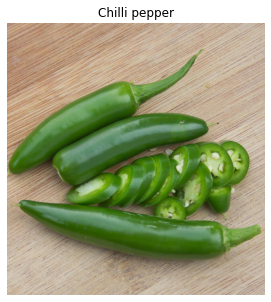

In [7]:
random.seed(3)

# 1. Get all image paths (* means "any combination")
# Compiles a list of paths when it finds a .jpg file

image_path_list = list(dataset_path.glob("*/*/*.jpg")) 

# 2. Randomly Chooses a Path for the Img
random_image_path = random.choice(image_path_list) 

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

print(random_image_path.parent) # What stem does is get the current folder of the parent folder


# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")

plt.figure(figsize=(5,5))
plt.axis(False)
plt.title(image_class.capitalize())
plt.imshow(img)
plt.show()
# plt.close()

# Source: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb

In [8]:
# This only applies for PATH objects only
train_path = dataset_path / "train"
val_path = dataset_path / "validation"
test_path = dataset_path / "test"

train_path, val_path, test_path

(WindowsPath('FruitsVegetables/train'),
 WindowsPath('FruitsVegetables/validation'),
 WindowsPath('FruitsVegetables/test'))

In [9]:
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 <- very neat stuff
    # does this mean the channel output would be 0?
])

train_data = datasets.ImageFolder(root=train_path, #represents the root folder,
                                 transform=data_transform,
                                 target_transform=None)

test_data = datasets.ImageFolder(root=test_path,
                                transform=data_transform)

train_data

Dataset ImageFolder
    Number of datapoints: 3115
    Root location: FruitsVegetables\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [12]:
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=64, 
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more) <-- Need to Understand this
                              shuffle=True) 

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=64, 
                             num_workers=1, 
                             shuffle=False) # don't usually need to shuffle testing data

train_feature, train_label = next(iter(train_dataloader))

train_feature.shape, train_label.shape


(torch.Size([64, 3, 64, 64]), torch.Size([64]))

In [10]:
# Setting up cuda for our training model
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [18]:
class Fruit_Detector(nn.Module):
    def __init__(self, input_shape, hidden_shape, output_shape):
        super().__init__()
        
        self.c_layer = nn.Sequential(
            
            Conv2d(in_channels=input_shape, # 64 x 64 x 3
                   out_channels=hidden_shape, # 62 x 62 x 64
                   kernel_size=3),
            ReLU(),
            MaxPool2d(3,3), # 20 x 20 x 64
            
            Conv2d(in_channels=hidden_shape,  # 20 x 20 x 64
                   out_channels=hidden_shape, # 18 x 18 x 64
                   kernel_size=3),
            ReLU(),
            MaxPool2d(3,3)) # 6 x 6 x 64
            
            
        
        self.fc_layer = nn.Sequential(
            Flatten(),
            Dropout2d(p=0.5),
            Linear(hidden_shape * 6 * 6, 32), 
            Linear(32, output_shape)) 
        
    def forward(self, x):
        x = self.c_layer(x)
#         print(x.size())
        return self.fc_layer(x)

In [19]:
output_shape = len(train_data.classes)


model = Fruit_Detector(input_shape=3,
                       hidden_shape=64,
                       output_shape=output_shape)


# model.forward(train_feature[0].unsqueeze(dim=0))
prediction = model.forward(train_feature[0].unsqueeze(dim=0))
actual_value = train_label[0]

In [20]:
from tqdm.auto import tqdm

accuracy = Accuracy(task="multiclass", num_classes=len(train_data.classes))
optimizer = SGD(model.parameters(), lr=0.1) # gets the models parameters and does optimization
cross_entropy_loss = CrossEntropyLoss() # loss for multiclassification

def train_test_process(model,
                       train_dataloader: DataLoader, 
                       test_dataloader: DataLoader, 
                       optimizer: SGD, 
                       accuracy_fn: Accuracy, 
                       loss_fn, 
                       epochs: int):
    
    train_losses = []
    test_losses = []
    test_accuracies = []
    
    # sets the model to train mode
    model.train()
    for epoch in tqdm(range(epochs)):

        print(f"Epoch: {epoch}\n-------")
        train_loss = 0
        for batch, (X,y) in enumerate(train_dataloader):
#             print((X,y))

            # forward propogation, gets the predicted y value
            y_pred = model(X)

            # calculates the loss using cross entropy
            loss = loss_fn(y_pred, y)
            train_loss += loss

            # zeros the the gradients from before
            optimizer.zero_grad()

            # goes on to the next 
            loss.backward()
            optimizer.step()

                # Print out how many samples have been seen
            if batch % 400 == 0:
                print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

        train_loss /= len(train_dataloader)

        # sets the model to evaluation mode
        model.eval()
        test_accuracy, test_loss = 0,0

        with torch.inference_mode():
            for X,y in test_dataloader:
                y_pred = model(X)

                test_loss += loss_fn(y_pred, y)
                test_accuracy += accuracy_fn(y, y_pred.argmax(dim=1))

            test_loss /= len(test_dataloader)
            test_accuracy /= len(test_dataloader)
        
        
        train_losses.append(train_loss.detach().numpy())
        test_losses.append(test_loss.detach().numpy())
        test_accuracies.append(test_accuracy.detach().numpy())
        
        print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_accuracy * 100:.2f}%\n")
    
    return train_losses, test_losses, test_accuracies


In [21]:
EPOCHS = 32

train_losses, test_losses, test_accuracies = train_test_process(model=model,
                                                                train_dataloader=train_dataloader,
                                                                test_dataloader=test_dataloader,
                                                                optimizer=optimizer,
                                                                accuracy_fn=accuracy,
                                                                loss_fn=cross_entropy_loss,
                                                                epochs=EPOCHS)

  0%|          | 0/32 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/3115 samples

Train loss: 3.56212 | Test loss: 3.49566, Test acc: 6.25%

Epoch: 1
-------
Looked at 0/3115 samples

Train loss: 3.33141 | Test loss: 2.92075, Test acc: 18.45%

Epoch: 2
-------
Looked at 0/3115 samples

Train loss: 2.96182 | Test loss: 2.60526, Test acc: 25.42%

Epoch: 3
-------
Looked at 0/3115 samples

Train loss: 2.74172 | Test loss: 2.38095, Test acc: 22.47%

Epoch: 4
-------
Looked at 0/3115 samples

Train loss: 2.56138 | Test loss: 2.21397, Test acc: 32.87%

Epoch: 5
-------
Looked at 0/3115 samples

Train loss: 2.41005 | Test loss: 1.98842, Test acc: 41.99%

Epoch: 6
-------
Looked at 0/3115 samples

Train loss: 2.38057 | Test loss: 1.88991, Test acc: 44.73%

Epoch: 7
-------
Looked at 0/3115 samples

Train loss: 2.26497 | Test loss: 2.17014, Test acc: 32.99%

Epoch: 8
-------
Looked at 0/3115 samples

Train loss: 2.20147 | Test loss: 1.76355, Test acc: 46.92%

Epoch: 9
-------
Looked at 0/3115 samples

Train loss: 2.07224 | Test loss

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Test Accuracy (%)')]

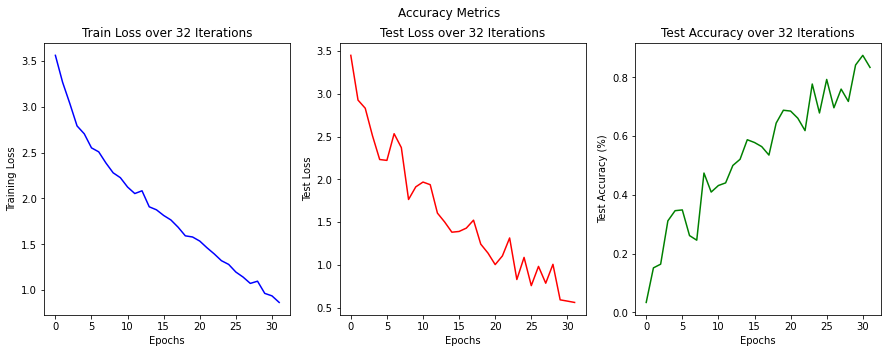

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

fig.suptitle("Accuracy Metrics")
ax[0].plot([i for i in range(EPOCHS)], train_losses, color="blue")
ax[0].set_title(f"Train Loss over {EPOCHS} Iterations")
ax[0].set(xlabel="Epochs", ylabel="Training Loss")

ax[1].plot([i for i in range(EPOCHS)], test_losses, color="red")
ax[1].set_title(f"Test Loss over {EPOCHS} Iterations")
ax[1].set(xlabel="Epochs", ylabel="Test Loss")

ax[2].plot([i for i in range(EPOCHS)], test_accuracies, color="green")
ax[2].set_title(f"Test Accuracy over {EPOCHS} Iterations")
ax[2].set(xlabel="Epochs", ylabel="Test Accuracy (%)")

In [ ]:
# Look at what certain parameter changes can result in better accuracy
# 1. Increased Image Size <- Did not increase the overall testing accuracy
# 2. Larger Kernel Size <- N/A not conclusive
# 3. More Convolutional Layers <- Decreased One Layer and Resulted in Less Accuracy
# 4. Overfitting or Underfitting <- Model seems to be 
# 5. More Training = Better Accuracy? <- Lets find out lmao
# 6. Decrease Learning Rate (Model is )
# Max Test Accuracy = 79 %


# Model has a high variance, training loss